## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from statsmodels.stats.outliers_influence import variance_inflation_factor
from textblob import TextBlob
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


## Importing the Dataset

In [2]:
df= pd.read_csv('GOT_main.csv')


## Exploring The Dataset

In [3]:
print(df.head())

                                       id languageCode submissionDate  \
0  /title/tt0944947/userreviews/rw4877695          eng      5/21/2019   
1  /title/tt0944947/userreviews/rw5621450          eng       4/9/2020   
2  /title/tt0944947/userreviews/rw3853874          eng      11/9/2017   
3  /title/tt0944947/userreviews/rw4886015          eng      5/25/2019   
4  /title/tt0944947/userreviews/rw4841248          eng      5/10/2019   

                                          reviewText  authorRating  \
0  Let's say you're reading these reviews and hav...           8.0   
1  I'm feeling so heartbroken to see everyone cri...          10.0   
2  Was over-time on a gradual binge of watching '...          10.0   
3  It was a master piece. It was written to the p...           8.0   
4  I would give this an easy 10/10.. if season 8 ...           9.0   

   helpfulnessScore  spoiler  
0          0.887923    False  
1          0.857426    False  
2          0.784321    False  
3          0.892

# Variables
id (string):                Unique identifiers for each of the reviews of Game of Thrones referenced in IMDb data

languageCode (string):      The language of the review

submissionDate (MM/DD/YYYY):The date of submission of the review  

reviewText (string):       The reviews and recomeendations given by the user in text format.

authorRating (float):        IMDb registered users can cast a vote (from 1 to 10) on the Game Of Thrones tv show.

helpfulnessScore (float):  Via the app, users can tap the thumbs up (Helpful) or thumbs down (Not Helpful) icon to indicate his opinion of the review.Please note that "helpful" doesn't necessarily imply the review was "positive" or "favorable". A review can be helpful even if it is negative, because it can help readers decide not to watch it.

spoiler (boolean):         True: if the review content gives spoiler to other users; False: No spoilers in the content


In [4]:
df.head()

,id,languageCode,submissionDate,reviewText,authorRating,helpfulnessScore,spoiler
0,/title/tt0944947/userreviews/rw4877695,eng,5/21/2019,Let's say you're reading these reviews and hav...,8.0,0.887923,False
1,/title/tt0944947/userreviews/rw5621450,eng,4/9/2020,I'm feeling so heartbroken to see everyone cri...,10.0,0.857426,False
2,/title/tt0944947/userreviews/rw3853874,eng,11/9/2017,Was over-time on a gradual binge of watching '...,10.0,0.784321,False
3,/title/tt0944947/userreviews/rw4886015,eng,5/25/2019,It was a master piece. It was written to the p...,8.0,0.892524,False
4,/title/tt0944947/userreviews/rw4841248,eng,5/10/2019,I would give this an easy 10/10.. if season 8 ...,9.0,0.832666,True


# Shape & Column Names

In [5]:
print(df.shape)

(5491, 7)


In [6]:
print(df.columns)

Index(['id', 'languageCode', 'submissionDate', 'reviewText', 'authorRating',
       'helpfulnessScore', 'spoiler'],
      dtype='object')


# Checking the data type of columns

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5491 non-null   object 
 1   languageCode      5491 non-null   object 
 2   submissionDate    5491 non-null   object 
 3   reviewText        5491 non-null   object 
 4   authorRating      5358 non-null   float64
 5   helpfulnessScore  5453 non-null   float64
 6   spoiler           5491 non-null   bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 262.9+ KB
None


# Descriptive Statistics

In [8]:
print(df.describe())

       authorRating  helpfulnessScore
count   5358.000000       5453.000000
mean       7.798619          0.246733
std        3.072508          0.172273
min        1.000000          0.000000
25%        7.000000          0.097461
50%        9.000000          0.215216
75%       10.000000          0.358935
max       10.000000          0.892524


In [9]:
# getting the median values of numeric columns
median_values = df.median()

print(median_values)

authorRating        9.000000
helpfulnessScore    0.215216
spoiler             0.000000
dtype: float64


# Checking for duplicate values

In [10]:
duplicate=df.duplicated().sum()
print(duplicate)

0


# Checking for Null values

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

id                    0
languageCode          0
submissionDate        0
reviewText            0
authorRating        133
helpfulnessScore     38
spoiler               0
dtype: int64


# Checking the percentage of values that are missing

In [12]:
missing_percentages = (df.isnull().sum() / len(df)) * 100

print(missing_percentages)

id                  0.000000
languageCode        0.000000
submissionDate      0.000000
reviewText          0.000000
authorRating        2.422145
helpfulnessScore    0.692042
spoiler             0.000000
dtype: float64


Here we can see that few  missing values are there for authorRating and helpfulnessScore column.


Now we can fill the missing values with the measures of central tendency.

In [13]:

## Mean imputation assumes that the missing values have a normal distribution.
## If the data is skewed or has outliers, mean imputation might not be the best choice.

# checking for Outliers

AxesSubplot(0.125,0.125;0.775x0.755)


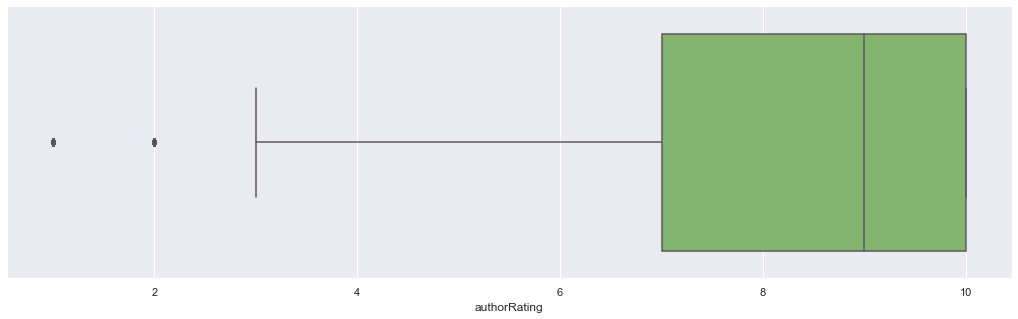

In [14]:
#CHECKING FOR authorRating COLUMN
sns.set(rc={"figure.figsize":(18,5)})

print(sns.boxplot(df['authorRating'],palette='summer'))

AxesSubplot(0.125,0.125;0.775x0.755)


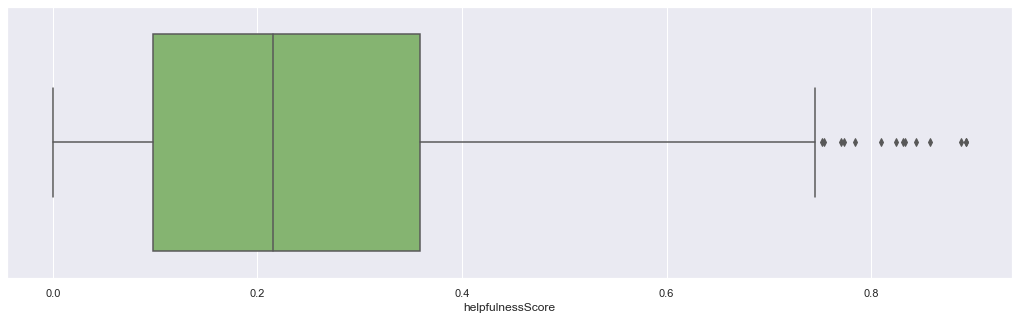

In [15]:
#CHECKING FOR helpfulnessScore COLUMN
sns.set(rc={"figure.figsize":(18,5)})

print(sns.boxplot(df['helpfulnessScore'],palette='summer'))

In [16]:
# Check for null values in the intersection of both columns
null_intersection = df[df['authorRating'].isnull() & df['helpfulnessScore'].isnull()]

# Display the rows where both columns are null
print(null_intersection)



                                          id languageCode submissionDate  \
3692  /title/tt0944947/userreviews/rw6876818          eng       5/3/2021   

                                             reviewText  authorRating  \
3692  Tyrion was overacting the entire time. It was ...           NaN   

      helpfulnessScore  spoiler  
3692               NaN    False  


In [17]:
# Remove rows with null values in the intersection of both columns , since those reviews will  not be very useful
filtered_df = df[~(df['authorRating'].isnull() & df['helpfulnessScore'].isnull())]


# Replace the remaining null values with the median, as there are outliers within the dataset.
filtered_df['authorRating']= filtered_df['authorRating'].fillna(filtered_df['authorRating'].median())
filtered_df['helpfulnessScore']= filtered_df['helpfulnessScore'].fillna(filtered_df['helpfulnessScore'].median())


C:\Users\Sumit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sumit\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
filtered_df.isnull().sum()

id                  0
languageCode        0
submissionDate      0
reviewText          0
authorRating        0
helpfulnessScore    0
spoiler             0
dtype: int64

# Transforming Categorical Variables with suitable Dummies

In [19]:

# Apply one-hot encoding using pd.get_dummies()
new_df = pd.get_dummies(filtered_df, columns=['spoiler'],drop_first=True)
print(new_df)

                                          id languageCode submissionDate  \
0     /title/tt0944947/userreviews/rw4877695          eng      5/21/2019   
1     /title/tt0944947/userreviews/rw5621450          eng       4/9/2020   
2     /title/tt0944947/userreviews/rw3853874          eng      11/9/2017   
3     /title/tt0944947/userreviews/rw4886015          eng      5/25/2019   
4     /title/tt0944947/userreviews/rw4841248          eng      5/10/2019   
...                                      ...          ...            ...   
5486  /title/tt0944947/userreviews/rw4938475          eng      6/16/2019   
5487  /title/tt0944947/userreviews/rw5302336          eng      12/5/2019   
5488  /title/tt0944947/userreviews/rw7824742          eng       2/1/2022   
5489  /title/tt0944947/userreviews/rw6512536          eng      1/22/2021   
5490  /title/tt0944947/userreviews/rw4928951          eng      6/11/2019   

                                             reviewText  authorRating  \
0     Let's sa

# Visualize the categorical variables

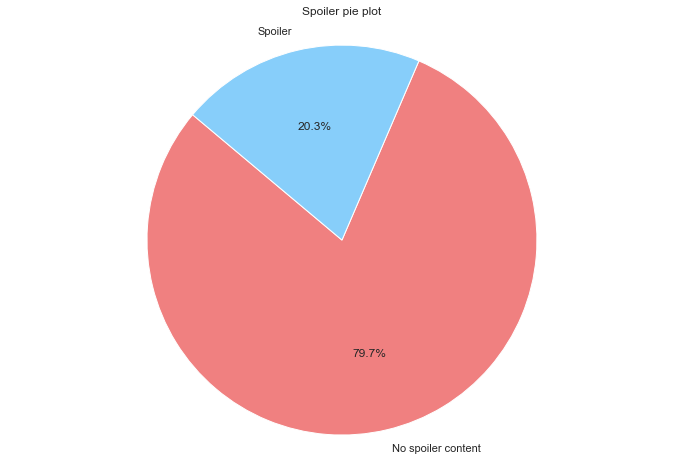

In [46]:


# Group the data by sentiment and count the occurrences
spoiler_counts = new_df['spoiler_True'].value_counts()

# Define colors for the pie slices
colors = [ 'lightcoral', 'lightskyblue']

# Create a pie plot
plt.figure(figsize=(12, 8))

plt.pie(spoiler_counts, labels=['No spoiler content','Spoiler'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a title
plt.title("Spoiler pie plot")

# Show the plot
plt.show()


Based on this analysis, it's evident that a mere 20.3% of the reviews contain spoiler content within the text, while the rest of the reviews do not feature such content.

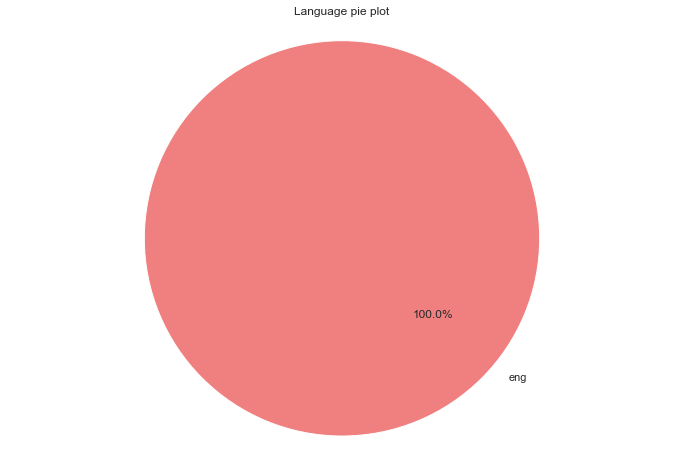

In [47]:
ex.pie(new_df,names='languageCode',title='Language pie plot',hole=0.3)


# Group the data by sentiment and count the occurrences
language_counts = new_df['languageCode'].value_counts()

# Define colors for the pie slices
colors = [ 'lightcoral', 'lightskyblue']

# Create a pie plot
plt.figure(figsize=(12, 8))

plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a title
plt.title("Language pie plot")

# Show the plot
plt.show()


Considering this analysis, because all the reviews are composed in the English language, conducting text data analysis will be straightforward.

# Visualizing the Numerical Variable

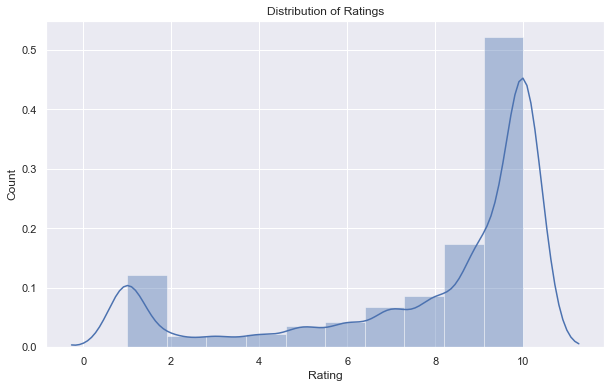

In [22]:
plt.figure(figsize=(10, 6))
sns.distplot(new_df['authorRating'], bins=10, kde=True)  
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

We can clearly see here that most of the ratings are in the group between 8-10 age range . So the mean is around this range only. 

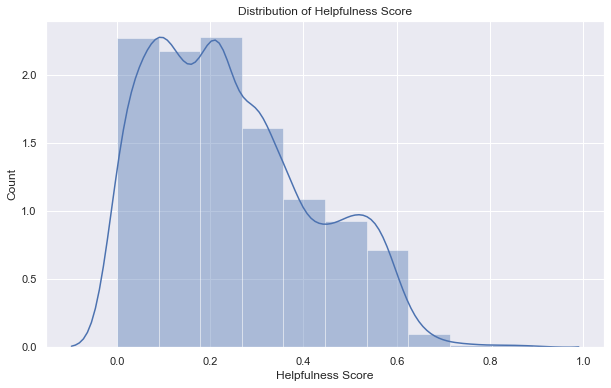

In [23]:
plt.figure(figsize=(10, 6))
sns.distplot(new_df['helpfulnessScore'], bins=10, kde=True)  
plt.title('Distribution of Helpfulness Score')
plt.xlabel('Helpfulness Score')
plt.ylabel('Count')
plt.show()

# Correlation matrix- Checking for multicolinearity

AxesSubplot(0.125,0.125;0.62x0.755)


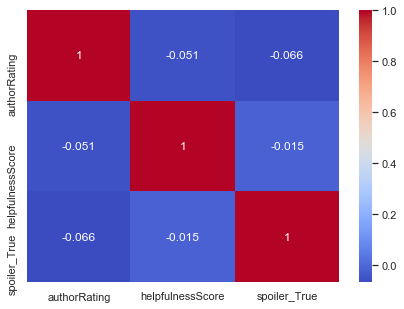

In [24]:
correlation_matrix=new_df.corr()

# Create a heatmap
sns.set(rc={"figure.figsize":(7,5)})
print(sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'))

# Display the plot
plt.show()

Due to the minimal correlation between the variables, it is safe to conclude that there is no issue of multicollinearity.

In [25]:
def calc_vif(x):
    #calculating VIF
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [26]:
print(calc_vif(new_df[['authorRating','helpfulnessScore']]))

          variables       VIF
0      authorRating  2.320923
1  helpfulnessScore  2.320923


 Given that the VIF (Variance Inflation Factor) is below 10, there are no issues related to multicollinearity concerning the numerical variables. Additionally, the correlation coefficient between any pair of variables does not exceed 0.1.

# Sentiment Analysis

## Preprocessing and Sentiment Analysis

During our initial data preprocessing step, we began by converting all the text in the "reviewText" column to lowercase. Following this, we removed any special characters from the text. We then performed tokenization to break down the text into individual words and proceeded to eliminate common stop words from this list of words. Afterward, we isolated each word for emotion analysis. Utilizing the TextBlob library, we assessed the sentiment of each text in the column and calculated the polarity for the topics.

The **Polarity** is a floating-point value ranging between -1 and 1, where a **1** signifies a strongly positive sentiment, and a **-1** represents a significantly negative sentiment.

Therefore, they will play a significant role in assessing the online community's sentiment regarding the television series Game of Thrones.

In [29]:
# Function to preprocess, tokenize, and get sentiment labels
def preprocess_tokenize_and_get_sentiment(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits using regular expressions
    text = re.sub(f"[{re.escape(string.punctuation)}\d]", "", text)
    
        # Tokenize the text
    words = word_tokenize(text,"english")
    
        # Remove NLTK's English stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    text = ' '.join(words)
    
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    
    if sentiment > 0:
        sentiment_label = 'Positive'
    elif sentiment < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    return sentiment_label, sentiment

# Apply sentiment analysis to the DataFrame after preprocessing and tokenization
new_df[['Sentiment', 'Polarity']] = new_df['reviewText'].apply(lambda x: pd.Series(preprocess_tokenize_and_get_sentiment(x)))

# Display the DataFrame with sentiment analysis results including polarity
print(new_df)

                                          id languageCode submissionDate  \
0     /title/tt0944947/userreviews/rw4877695          eng      5/21/2019   
1     /title/tt0944947/userreviews/rw5621450          eng       4/9/2020   
2     /title/tt0944947/userreviews/rw3853874          eng      11/9/2017   
3     /title/tt0944947/userreviews/rw4886015          eng      5/25/2019   
4     /title/tt0944947/userreviews/rw4841248          eng      5/10/2019   
...                                      ...          ...            ...   
5486  /title/tt0944947/userreviews/rw4938475          eng      6/16/2019   
5487  /title/tt0944947/userreviews/rw5302336          eng      12/5/2019   
5488  /title/tt0944947/userreviews/rw7824742          eng       2/1/2022   
5489  /title/tt0944947/userreviews/rw6512536          eng      1/22/2021   
5490  /title/tt0944947/userreviews/rw4928951          eng      6/11/2019   

                                             reviewText  authorRating  \
0     Let's sa

In [32]:
new_df.to_csv('GOT_REVIEW_sentiment_analysis.csv',sep=',', index=False ,encoding='utf-8')


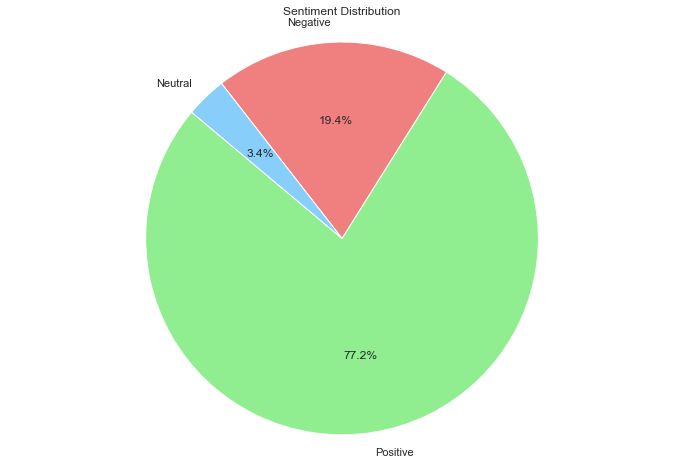

In [42]:


# Group the data by sentiment and count the occurrences
sentiment_counts = new_df['Sentiment'].value_counts()

# Define colors for the pie slices
colors = ['lightgreen', 'lightcoral', 'lightskyblue']

# Create a pie plot
plt.figure(figsize=(12, 8))

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a title
plt.title("Sentiment Distribution")

# Show the plot
plt.show()


# Observation:
The sentiment distribution analysis reveals intriguing insights about the reception of the TV series "Game of Thrones." Evidently, a substantial majority of reviews, approximately 78%, express a positive sentiment towards the show. This overwhelmingly favorable response reflects the widespread appeal and acclaim garnered by "Game of Thrones."

A noteworthy observation emerges when considering the ratings provided by reviewers. It becomes evident that a significant portion of the ratings falls within the range of 8 to 10. This concentration of high ratings reaffirms the series' popularity and the exceptional level of satisfaction it imparts to its viewers. The data implies that the show has effectively captured the hearts and minds of its audience, fostering a deeply positive sentiment among its viewers.

In summary, the sentiment analysis of "Game of Thrones" reviews underscores the remarkable extent of positive sentiment that surrounds the series. The preponderance of high ratings within the 8-10 range serves as a testament to its widespread popularity and success in eliciting enthusiasm and appreciation from its audience. This data attests to the enduring impact of the show and its ability to resonate with a broad and highly satisfied viewership.

# THANK YOU! HAPPY CODING😊☺☺😊! KEEP LEARNING!😎